In [14]:
from math import sqrt
# from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
# from tiffimage 
import matplotlib.pyplot as plt
import tifffile as tf
# import DataRead as DR
import numpy as np
%matplotlib inline
from skimage import data, img_as_float
from skimage import exposure
from read_roi import read_roi_file, read_roi_zip
import inspect
import os
import json
from pathlib import Path
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
from os.path import exists
from skimage.filters import try_all_threshold, threshold_triangle, threshold_mean,threshold_otsu,threshold_isodata,threshold_li,threshold_yen

In [54]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,CB91_Purple, CB91_Violet]

CB91_Grad_BP = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

In [55]:
scale = 4.81

In [56]:
def Show_all_channels(img,num_channels):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
    ax = axes.ravel()
    for i in range(0,4):
         ax[i].imshow(img[i])
#         print(img[i])
    plt.tight_layout()
    plt.show()

In [57]:
def mRNA_detection(img,somas,dendrites,threshold, show_plot:bool):
    fig, axes = plt.subplots(1, 2, figsize=(16, 16), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[1].imshow(img)
    blobs_log = blob_log(img, min_sigma = 1.1,max_sigma= 100,threshold=threshold)
    # blobs_log[:, 2] = blobs_log[:, 2] * sqrt(8)
#     mod_t = np.zeros(s_t_stack[2:])
    # print(np.shape(mod_t))
    if show_plot:
        count = 0;
        blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
        ax[0].imshow(img)
        for blob in blobs_log:
            y, x, r = blob
            i_x = int(x)
            i_y = int(y)
            count += 1;
    #         mod_t[i_y][i_x] = t[idx][i_y][i_x]
            c = plt.Circle((x, y), r, color='g', linewidth=.5, fill=False)
            ax[0].add_patch(c)
    #     print(count,"\n",len(mod_t))
        ax[0].set_axis_off()
        ax[1].set_axis_off()

        
#     colors = ['r','g','b','y','k',]
#     print("somas = ",somas)
    for idx,soma in enumerate(somas):
        vertices = list(somas[soma])
#         print("vertices",vertices)
#         for i,point in enumerate(vertices[1:]):
#             print("drawing a line between ", vertices[i-1],vertices[i])
#         adding to list to complete the polygone
        vertices[0].append(vertices[0][0])
        vertices[1].append(vertices[1][0])
        ax[0].plot(vertices[0],vertices[1],marker=".",color=CB91_Grad_BP[idx],linewidth=1.0)
    
    for idx,dendrite in enumerate(dendrites):
        vertices = list(dendrites[dendrite])
#         print("vertices",vertices)
#         for i,point in enumerate(vertices[1:]):
#             print("drawing a line between ", vertices[i-1],vertices[i])
#         adding to list to complete the polygone
        ax[0].plot(vertices[0],vertices[1],marker=None,color=CB91_Grad_BP[-idx],linewidth=vertices[2]*scale,alpha=0.1,label=dendrite)
#     Draw_somas_On_Image(fig,somas)
    ax[0].legend()
    plt.tight_layout()
    plt.show()
    return blobs_log

In [58]:
def mRNA_classification(img,somas,dendrites,somatic_points,dendritic_points):
    fig, axes = plt.subplots(1,1, figsize=(16, 16), sharex=True, sharey=True)
#     ax = axes.ravel()
    axes.imshow(img)
#     blobs_log = blob_log(img, min_sigma = 1.1,max_sigma= 5,threshold=50)
    # blobs_log[:, 2] = blobs_log[:, 2] * sqrt(8)
#     mod_t = np.zeros(s_t_stack[2:])
    # print(np.shape(mod_t))
#     if show_plot:
    count = 0;
#     somatic_points[:, 2] = somatic_points[:, 2] * sqrt(2)
#     dendritic_points[:, 2] = dendritic_points[:, 2] * sqrt(2)
    axes.imshow(img)
    for blob in somatic_points:
        x,y,r,dist = blob
        i_x = int(x)
        i_y = int(y)
        count += 1;
#         mod_t[i_y][i_x] = t[idx][i_y][i_x]
        c = plt.Circle((x, y), r, color='g', linewidth=.5, fill=False)
        axes.add_patch(c)
#     print(count,"\n",len(mod_t))
    axes.set_axis_off()
#     axes.set_axis_off()
    
    for blob in dendritic_points:
        x,y,r = blob
        i_x = int(x)
        i_y = int(y)
        count += 1;
#         mod_t[i_y][i_x] = t[idx][i_y][i_x]
        c = plt.Circle((x, y), r, color='y', linewidth=.5, fill=False)
        axes.add_patch(c)
#     print(count,"\n",len(mod_t))
    axes.set_axis_off()
#     axes.set_axis_off()
        
#     colors = ['r','g','b','y','k']
#     print("somas = ",somas)
    for idx,soma in enumerate(somas):
        vertices = list(somas[soma])
#         print("vertices",vertices)
#         for i,point in enumerate(vertices[1:]):
#             print("drawing a line between ", vertices[i-1],vertices[i])
#         adding to list to complete the polygone
        vertices[0].append(vertices[0][0])
        vertices[1].append(vertices[1][0])
        axes.plot(vertices[0],vertices[1],marker=".",color=CB91_Grad_BP[idx],linewidth=1.0)
    for idx,dendrite in enumerate(dendrites):
        vertices = list(dendrites[dendrite])
#         print("vertices",vertices)
#         for i,point in enumerate(vertices[1:]):
#             print("drawing a line between ", vertices[i-1],vertices[i])
#         adding to list to complete the polygone
        axes.plot(vertices[0],vertices[1],marker=None,color=CB91_Grad_BP[-idx],linewidth=vertices[2]*scale,alpha=0.1,label=dendrite)


#     Draw_somas_On_Image(fig,somas)
    axes.legend()
    plt.tight_layout()
    plt.show()
#     return blobs_log

In [59]:
def Draw_neurons_On_Image(image,somas,dendrites):
    fig, axes = plt.subplots(1, 1, figsize=(8, 8), sharex=True, sharey=True)
    axes.imshow(image)
    colors = ['r','g','b','y','k']
#     print("somas = ",somas)
    for idx,soma in enumerate(somas):
        vertices = list(somas[soma])
#         print("vertices",vertices)
#         for i,point in enumerate(vertices[1:]):
#             print("drawing a line between ", vertices[i-1],vertices[i])
#         adding to list to complete the polygone
        vertices[0].append(vertices[0][0])
        vertices[1].append(vertices[1][0])
        plt.plot(vertices[0],vertices[1],marker=".",color=colors[idx],linewidth=1.0)
#     for idx,dendrite in enumerate(dendrites):
        
    plt.show()
    

In [60]:
# A Python3 program to check if a given point
# lies inside a given polygon
# Refer https://www.geeksforgeeks.org/check-if-two-given-line-segments-intersect/
# for explanation of functions onSegment(),
# orientation() and doIntersect()

# Define Infinite (Using INT_MAX
# caused overflow problems)
INT_MAX = 1000000

# Given three collinear points p, q, r,
# the function checks if point q lies
# on line segment 'pr'
def onSegment(p:tuple, q:tuple, r:tuple) -> bool:

    if ((q[0] <= max(p[0], r[0])) &
        (q[0] >= min(p[0], r[0])) &
        (q[1] <= max(p[1], r[1])) &
        (q[1] >= min(p[1], r[1]))):
        return True

    return False

# To find orientation of ordered triplet (p, q, r).
# The function returns following values
# 0 --> p, q and r are collinear
# 1 --> Clockwise
# 2 --> Counterclockwise
def orientation(p:tuple, q:tuple, r:tuple) -> int:

    val = (((q[1] - p[1]) *
            (r[0] - q[0])) -
        ((q[0] - p[0]) *
            (r[1] - q[1])))

    if val == 0:
        return 0
    if val > 0:
        return 1 # Collinear
    else:
        return 2 # Clock or counterclock

def doIntersect(p1, q1, p2, q2):

    # Find the four orientations needed for
    # general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    # General case
    if (o1 != o2) and (o3 != o4):
        return True

    # Special Cases
    # p1, q1 and p2 are collinear and
    # p2 lies on segment p1q1
    if (o1 == 0) and (onSegment(p1, p2, q1)):
        return True

    # p1, q1 and p2 are collinear and
    # q2 lies on segment p1q1
    if (o2 == 0) and (onSegment(p1, q2, q1)):
        return True

    # p2, q2 and p1 are collinear and
    # p1 lies on segment p2q2
    if (o3 == 0) and (onSegment(p2, p1, q2)):
        return True

    # p2, q2 and q1 are collinear and
    # q1 lies on segment p2q2
    if (o4 == 0) and (onSegment(p2, q1, q2)):
        return True

    return False

# Returns true if the point p lies
# inside the polygon[] with n vertices
def is_inside_polygon(points:list, p:tuple) -> bool:

    n = len(points)

    # There must be at least 3 vertices
    # in polygon
    if n < 3:
        return False

    # Create a point for line segment
    # from p to infinite
    extreme = (INT_MAX, p[1])
    count = i = 0

    while True:
        next = (i + 1) % n

        # Check if the line segment from 'p' to
        # 'extreme' intersects with the line
        # segment from 'polygon[i]' to 'polygon[next]'
        if (doIntersect(points[i],
                        points[next],
                        p, extreme)):

            # If the point 'p' is collinear with line
            # segment 'i-next', then check if it lies
            # on segment. If it lies, return true, otherwise false
            if orientation(points[i], p,
                        points[next]) == 0:
                return onSegment(points[i], p,
                                points[next])

            count += 1

        i = next

        if (i == 0):
            break

    # Return true if count is odd, false otherwise
    return (count % 2 == 1)

# # Driver code
# if __name__ == '__main__':

#     polygon1 = [ (0, 0), (10, 0), (10, 10), (0, 10) ]

#     p = (20, 20)
#     if (is_inside_polygon(points = polygon1, p = p)):
#         print ('Yes')
#     else:
#         print ('No')

#     p = (5, 5)
#     if (is_inside_polygon(points = polygon1, p = p)):
#         print ('Yes')
#     else:
#         print ('No')

#     polygon2 = [ (0, 0), (5, 0), (5, 5), (3, 3),(3,1) ]

#     p = (3, 3)
#     if (is_inside_polygon(points = polygon2, p = p)):
#         print ('Yes')
#     else:
#         print ('No')

#     p = (5, 1)
#     if (is_inside_polygon(points = polygon2, p = p)):
#         print ('Yes')
#     else:
#         print ('No')

#     p = (8, 1)
#     if (is_inside_polygon(points = polygon2, p = p)):
#         print ('Yes')
#     else:
#         print ('No')

#     polygon3 = [ (0, 0), (10, 0), (10, 10), (0, 10) ]

#     p = (-1, 10)
#     if (is_inside_polygon(points = polygon3, p = p)):
#         print ('Yes')
#     else:
#         print ('No')

# # This code is contributed by Vikas Chitturi



In [61]:
def isBetween(a,b,c):
# #     print("="*50)
# #     print(a,b,c)
#     crossproduct = (c[1] - a[1]) * (b[0] - a[0]) - (c[0] - a[0]) * (b[1] - a[1])
#     epsilon = 1e-6
#     # compare versus epsilon for floating point values, or != 0 if using integers
#     if abs(crossproduct) > epsilon:
# #         print("cp")
#         return False

#     dotproduct = (c[0] - a[0]) * (b[0] - a[0]) + (c[1] - a[1])*(b[1] - a[1])
#     if dotproduct < 0:
# #         print("dp")
#         return False

#     squaredlengthba = (b[0] - a[0])*(b[0] - a[0]) + (b[1] - a[1])*(b[1] - a[1])
#     if dotproduct > squaredlengthba:
# #         print("lp")
#         return False
# #     print("IB")
# #     print("="*50)
#     print("point in segment")
#     return True
    sides = np.zeros(3)
    sides[0] = (a[0]-b[0])**2 + (a[1]-b[1])**2  #ab
    original = sides[0]
    sides[1] = (b[0]-c[0])**2 + (b[1]-c[1])**2  #bc
    sides[2] = (c[0]-a[0])**2 + (c[1]-a[1])**2  #ca
    sides = np.sort(sides);
#     print(sides)
    if sides[2] > (sides[1] + sides[0]) and sides[2] != original:
#         print(c," not in section ",a,b)
        return False;
#     print("*"*20)
#     print(sides)
#     print("*"*20)
#     print(c," in section ",a,b)
    return True;
    
def Perpendicular_Distance_and_POI(a,b,c):
#     distance between two parallel lines, one passing (line1, A1 x + B1 y + C1 = 0) from a and b 
#     and second one (line 2, A1 x + B1 y + C2 = 0) parallel to line1 passing from c is given
#     |C1-C2|/sqrt(A1^2 + B1^2)
    m = (a[1]-b[1])/(a[0]-b[0]+1e-18)
    if m == 0:
        m = 1e-18
    c1 = a[1] - m*a[0]
    c2 = c[1] - m*c[0]
    dist = np.absolute(c1-c2)/np.sqrt(1+m**2)
    m_per = -1/m;
    c3 = c[1] - m_per*c[0]
    x_int = (c3 - c1)/(m-m_per)*1.0
    y_int = (m_per*x_int + c3)*1.0
    
    ax_int = np.sqrt((a[0]-x_int)**2 + (a[1]-y_int))
    bx_int = np.sqrt((b[0]-x_int)**2 + (b[1]-y_int))
    ab = np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
#     print("*"*20)
#     print("a = ",a,end="")
#     print("b = ",b,end="")
#     print("c = ",c,end="")
#     print("POI = ",(x_int,y_int))
#     print("ax_int + bx_int = ",ax_int+bx_int," ab = ",ab)
#     print(x_int,y_int,dist)
#     print("*"*20)
    return x_int,y_int,dist

def Is_On_Dendrite(dendrite_name,dendrite,point,max_dist):
    ## first check on which segment of the dendrite the point is present
#     print(dendrite)
#     mod_dendrite = np.delete(dendrite,2,0)
#     print(np.transpose(mod_dendrite))
#     xys = list(map(tuple, np.transpose(mod_dendrite)))
#     print(np.shape(np.transpose(mod_dendrite)))
    length_from_origin = 0
    for idx,x in enumerate(dendrite[0][:-1]):
#         x,y = p
        y = dendrite[1][idx]
#         print(x,y)
#     print()
        a = [x,y]
        b = [dendrite[0][idx+1],dendrite[1][idx+1]] 
        if isBetween(a,b,point):
            x_int,y_int,distance = Perpendicular_Distance_and_POI(a,b,point)
            if distance <= max_dist:
                length_from_origin += np.sqrt((y_int-a[1])**2 + (x_int-a[0])**2)
#                 print("point ",point," belong to dendrite ",dendrite_name," Distance is ", distance, " POI is ",(x_int,y_int))
                return True, length_from_origin/scale
        length_from_origin += np.sqrt((b[1]-a[1])**2 + (b[0]-a[0])**2)
    return False, -1

In [62]:
folder = "./Gria1/"
f_type = "SUM"
roi_folder = "Rois/"
somas = ["Soma_1.npy"]
dendrites = ["AllDendrites.npy"]
neurons = ["RoiSet.zip"] 
Channel_names = {0:"Dapi",1:"Gria1",2:"MAP2",3:"CAMKII"}

In [71]:
def Extract_mRNA_Data(filename,channel):


    t_stack = tf.TiffFile(filename)
    lsm_img = tf.imread(filename)
#             channel = ;
    ########## gaussian filter to remove background noise########

#         image = gaussian_filter(lsm_img[1], 1)
#         seed = np.copy(image)
#         seed[1:-1, 1:-1] = image.min()
#         mask = image

#         dilated = reconstruction(seed, mask, method='dilation')
#         fig, (ax0, ax1) = plt.subplots(nrows=2,
#                                     ncols=2,
#                                     figsize=(24, 20),
#                                     sharex=True,
#                                     sharey=True)

#         ax0[0].imshow(image, cmap='gray')
#         ax0[0].set_title('original image')
#         ax0[0].axis('off')

#         ax1[0].imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
#         ax1[0].set_title('dilated')
#         ax1[0].axis('off')
#         filtered = image - dilated
#         ax0[1].imshow(filtered, cmap='gray')
#         ax0[1].set_title('image - dilated')
#         ax0[1].axis('off')
#         print("image min and max ",image.min(),image.max())
#         print("filtered image min and max ",filtered.min(),filtered.max())
#         fig.tight_layout()

    ####################### blob detection on original and filtered image #########################

#         print(lsm_img.min(),lsm_img.max())
#         flsm_img = img_as_float(lsm_img)
#         print(flsm_img.min(),flsm_img.max())
#         print(np.shape(lsm_img))
#         Show_all_channels(lsm_img,num_c)
#         Show_all_channels(lsm_img,4)
#         mRNA_detection(image)
#         mRNA_detection(filtered)

    ####################### Reading the rois #########################
    correct_name = file.replace(f_type+"_","")
    correct_name = correct_name.replace(".tif","")
    correct_name = correct_name.replace(" ","_")
#         print(correct_name)
    soma_roi_zip_path = folder + roi_folder + correct_name + "/" + somas[0]
    file_exists = exists(soma_roi_zip_path)
    dendrites_roi_zip_path = folder + roi_folder + correct_name + "/" + dendrites[0]
#         print(os.path.isfile(soma_roi_zip_path))
#     if not file_exists:
#         soma_roi_zip_path =folder + roi_folder + correct_name + "/" + somas[1]
#         soma_rois = read_roi_file(soma_roi_zip_path)
#     else:
#         soma_rois = read_roi_zip(soma_roi_zip_path)
    soma_rois = np.load(folder+"cell_1/"+somas[0])
#         print(rois)
    dendrite_rois = np.load(folder+"cell_1/"+dendrites[0],allow_pickle=True)#             prinzt(dendrite_rois)
    soma_polygons = {}
    dendrite_lines = {}
    for soma in soma_rois.keys():
        soma_instance = soma_rois[soma]
        soma_polygons[soma] = [soma_instance['x'],soma_instance['y']]
#                 print(list(soma_polygons[soma]))
#         Draw_somas_On_Image(lsm_img[1],soma_polygons)
    for dendrite in dendrite_rois.keys():
        dendrite_instance = dendrite_rois[dendrite]
        dendrite_lines[dendrite] = [dendrite_instance['x'],dendrite_instance['y'],dendrite_instance['width']]
#                 print(list(dendrite_lines[dendrite]))
    threshold = threshold_mean(lsm_img[channel]);
    mRNA_points = mRNA_detection(lsm_img[channel],soma_polygons,dendrite_lines,threshold,show_plot=True)
#         print(mRNA_points)
    somatic_mRNA = []
    non_somatic_mRNA =[]
    num_somatic_mRNA = 0
    num_non_somaitc_mRNA = 0
    soma_ploys = {}
    somatic_punctas ={}
#         for soma in soma_rois.keys():

#         print(soma_polygons)
#         print(mRNA_points[:,2])
    for soma in soma_rois.keys():
        somatic_punctas[soma] = []
    for mRNA_point in mRNA_points:
        y, x, r = mRNA_point
        non_somatic = True
        for soma in soma_rois.keys():
#                 print("trying for soma.." , soma)
            if (is_inside_polygon(points =  list(map(tuple, np.transpose(soma_polygons[soma]))), p = (x,y))  \
                          or is_inside_polygon(points =  list(map(tuple, np.transpose(soma_polygons[soma]))), p = (x,y-1)) \
                           or is_inside_polygon(points =  list(map(tuple, np.transpose(soma_polygons[soma]))) , p = (x,y+1)))\
                        and non_somatic:\

#                     print((x,y),"point belongs to soma = ",soma)
                num_somatic_mRNA +=1
                somatic_mRNA.append([x,y,r,0])
                somatic_punctas[soma].append([x,y,r,0])
                non_somatic = False
        if non_somatic:
            num_non_somaitc_mRNA +=1
            non_somatic_mRNA.append([x,y,r])
    somatic_punctas["count"] = num_somatic_mRNA
    print("total somatic mRNA puncta = ",num_somatic_mRNA)
#         print("somatic mrna = ",somatic_mRNA)
    print("total non somatic mRNA puncta = ",num_non_somaitc_mRNA)
    print("sum  mRNA puncta = ",num_somatic_mRNA + num_non_somaitc_mRNA)
    print("total  mRNA puncta = ",len(mRNA_points))
#         print("non somatic mrna = ",non_somatic_mRNA)
    #uncomment this line to see somatic vs non-somatic puncte
    mRNA_classification(lsm_img[channel],soma_polygons,dendrite_lines,somatic_mRNA,non_somatic_mRNA)
    inter = [[x for x in set(tuple(x) for x in somatic_mRNA) & set(tuple(x) for x in non_somatic_mRNA)]]
#             print(inter)
    print("*"*50)
    return somatic_punctas,soma_polygons, somatic_mRNA, non_somatic_mRNA,dendrite_lines,lsm_img[channel]
    #                     print((x,y),"point is not somatic mRNA ")
    #         print ('Yes')
    #       Draw_Polygone_On_Image(image,points=list(soma_polygons['Soma_001']))
            # Gria1/Rois/gria1_as _camkii_exp02_c08

In [72]:
def Non_Somatic_Puncta_classification(points,dendrites,max_dist):
    outside = 0
    dendritic = 0
    dendritic_punctas = {}
    non_dendritic_punctas = {}
    for dendrite in dendrites.keys():
        dendritic_punctas[dendrite] = []
    non_dendritic_punctas['outside'] = []
    for idx,point in enumerate(points):
        x,y,r = point
        non_dendritic = True
#         print(point)
        for jdx,dendrite in enumerate(dendrites.keys()):
            on_dendrite, distance_from_origin = Is_On_Dendrite(dendrite,dendrites[dendrite],[x,y],max_dist)
            if non_dendritic and on_dendrite:
#                 print(dendrites[dendrite])
#                 print("D ",dendrite," ",point," distance from start = ",distance_from_origin)
                non_dendritic = False
                dendritic_punctas[dendrite].append([x,y,r,distance_from_origin])
                dendritic += 1
        if non_dendritic:
#             print("ND",end="")
            
            non_dendritic_punctas["outside"].append([x,y,r])
            outside += 1
    for key in dendritic_punctas.keys():
        #     print(dendritic_punctas[key][0])
            dend_dist = np.array(dendritic_punctas[key])
            dend_dist = np.squeeze(dend_dist)
            dend_dist = dend_dist.reshape(np.shape(dendritic_punctas[key]))
        #     print(np.shape(dend_dist))
            if np.shape(dend_dist)[0]>0:
                dendritic_punctas[key] = dend_dist[dend_dist[:,3].argsort()].tolist()
    dendritic_punctas["count"] = dendritic
    non_dendritic_punctas["count"] = outside
    print("\ndendritic points = ",dendritic)
    print("\noutside = ",outside)
    return dendritic_punctas, non_dendritic_punctas

In [73]:
def mRNA_dendritic_classification(img,dendrites,dendritic_points,non_dendritic_points,filename,title):
    fig, axes = plt.subplots(1,1, figsize=(10,10 ), sharex=True, sharey=True)
#     ax = axes.ravel()
    axes.imshow(img)
#     ax[1].imshow(np.zeros((np.shape(img))))
#     blobs_log = blob_log(img, min_sigma = 1.1,max_sigma= 5,threshold=50)
    # blobs_log[:, 2] = blobs_log[:, 2] * sqrt(8)
#     mod_t = np.zeros(s_t_stack[2:])
    # print(np.shape(mod_t))
#     if show_plot:
    count = 0;
#     somatic_points[:, 2] = somatic_points[:, 2] * sqrt(2)
#     dendritic_points[:, 2] = dendritic_points[:, 2] * sqrt(2)
#     axes.imshow(img)
#     for blob in dendritic_points:
#         y, x, r = blob
#         i_x = int(x)
#         i_y = int(y)
#         count += 1;
# #         mod_t[i_y][i_x] = t[idx][i_y][i_x]
#         c = plt.Circle((x, y), r, color='y', linewidth=.5, fill=False)
#         axes.add_patch(c)
# #     print(count,"\n",len(mod_t))
#     axes.set_axis_off()
# #     axes.set_axis_off()
        
    for idx,dendrite in enumerate(dendrites.keys()):
        vertices = dendrites[dendrite]
#         print("vertices",vertices)
#         for i,point in enumerate(vertices[1:]):
#             print("drawing a line between ", vertices[i-1],vertices[i])
#         adding to list to complete the polygone
#         if dendrite == "Primary_100_002_s002":
        axes.plot(vertices[0],vertices[1],marker="+",color=CB91_Grad_BP[1],linewidth=scale,alpha=0.1)
#         ax[1].plot(vertices[0],vertices[1],marker="+",color=CB91_Grad_BP[1],linewidth=15*scale,alpha=0.1)


        for blob in dendritic_points[dendrite]:
            x, y, r,dist = blob
            x = int(x)
            y = int(y)
            count += 1;
    #         mod_t[i_y][i_x] = t[idx][i_y][i_x]
            c = plt.Circle((x, y), r*sqrt(2), color='y', linewidth=.5, fill=False)
            axes.add_patch(c)
#     Draw_somas_On_Image(fig,somas)
#     axes.legend()
#     print(np.shape(non_dendritic_punctas))
    for key in non_dendritic_points.keys():
        if key != "count":
            x = int(x)
            i_y = int(y)
            count += 1;
        #         mod_t[i_y][i_x] = t[idx][i_y][i_x]
            c = plt.Circle((x, y), r*sqrt(2), color='g', linewidth=.5, fill=False)
            axes.add_patch(c)
    plt.tight_layout()
    plt.title(title)
    print("saving figure to "+filename)
    plt.savefig(filename+".png",dpi=199)
    plt.savefig(filename+".eps",dpi=199)
    plt.show()
#     return blobs_log

In [74]:
# Analyse_mRNA_Data(0)
# somatic_mRNA, non_somatic_mRNA,dendrite_lines = Analyse_mRNA_Data(1)
# Analyse_mRNA_Data(2)
somatic_punctas = {}
soma_polygons = {}
somatic_mRNA = []
non_somatic_mRNA = []
dendrite_lines = {}
lsm_img = []
dendritic_punctas = {}
non_dendritic_punctas = {}
for idx,file in enumerate(os.listdir(folder+f_type+"/")):
    if file.endswith(".tif") and "gria1 as camkii exp02 c01" in file:
        print("*"*50)
        print("Analysing for ",file)
        fname = folder+f_type+"/"+file
        print(fname)
        # for jdx,dendrite in enumerate(dendrite_lines.keys()):
#     print(dendrite," ",dendrite_lines[dendrite])
        channel = 3;
        #seperating somatic vs non-somatic punctas
        somatic_punctas,soma_polygons, somatic_mRNA, non_somatic_mRNA,dendrite_lines,lsm_img = Extract_mRNA_Data(fname,channel)
        
        #Classifying non-somatic puncte into dendritic rois and outside
        # calculating the distace of dendrtic puncte from the origin
        dendrite_width = 15 #in um and *scale for in Pixels
        dendritic_punctas, non_dendritic_punctas = Non_Somatic_Puncta_classification(non_somatic_mRNA,dendrite_lines,dendrite_width*scale)
        # print(dendritic_punctas)
        
#     print(dendritic_punctas[key][0])


        #writing to JSON
        path_to_op = folder+f_type+"/"+Channel_names[channel]+"/"+str(dendrite_width)+"/"
        Path(path_to_op).mkdir(parents=True, exist_ok=True)
        soma_op = path_to_op+"Soma_mRNA"+Channel_names[channel];
        dendrite_op = path_to_op+"Dendrite_mRNA"+Channel_names[channel];
        outsied_op = path_to_op+"Outside_mRNA"+Channel_names[channel];
        with open(soma_op+".json", 'w') as f:
            json.dump(somatic_punctas, f,sort_keys=True, indent=4)
        with open(dendrite_op+".json", 'w') as f:
            json.dump(dendritic_punctas, f,sort_keys=True, indent=4)
        with open(outsied_op+".json", 'w') as f:
            json.dump(non_dendritic_punctas, f,sort_keys=True, indent=4)

        mRNA_dendritic_classification(lsm_img,dendrite_lines,dendritic_punctas,{},dendrite_op,Channel_names[channel]+"Dendritic mRNA")
#         print(soma_polygons)
        mRNA_dendritic_classification(lsm_img,soma_polygons,somatic_punctas,{},soma_op,Channel_names[channel]+"Somatic mRNA")
        mRNA_dendritic_classification(lsm_img,{},{},non_dendritic_punctas,outsied_op,Channel_names[channel]+"Background mRNA")
        # print(soma_polygons)
        # mRNA_dendritic_classification(lsm_img,soma_polygons,somatic_punctas,{})
        # mRNA_dendritic_classification(lsm_img,{},{},non_dendritic_punctas)

**************************************************
Analysing for  SUM_gria1 as camkii exp02 c01.tif
./Gria1/SUM/SUM_gria1 as camkii exp02 c01.tif


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

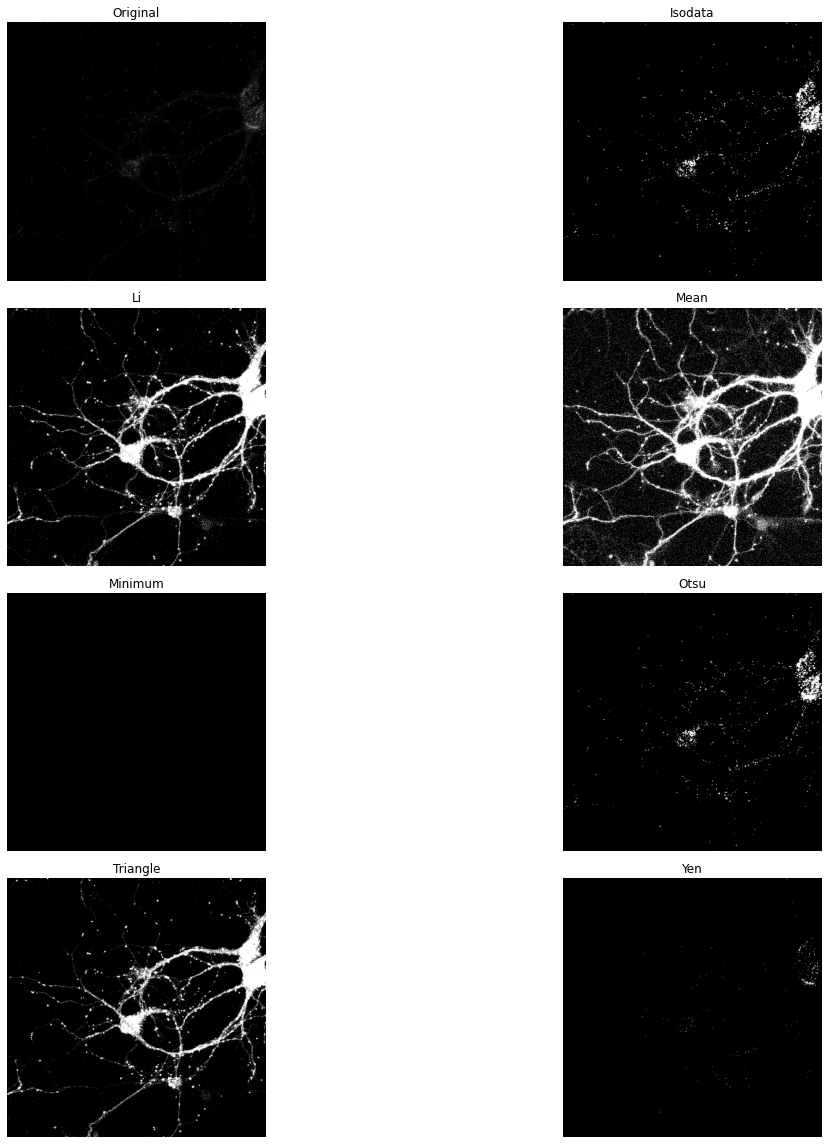

In [38]:
fig, ax = try_all_threshold(lsm_img, figsize=(20, 16), verbose=False)
plt.show()

In [39]:
Perpendicular_Distance_and_POI([0,0],[3,0],[3,4])

(3.0, 0.0, 4.0)

******************** MEAN ********************


<ipython-input-5-73c604e3eb0d>:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


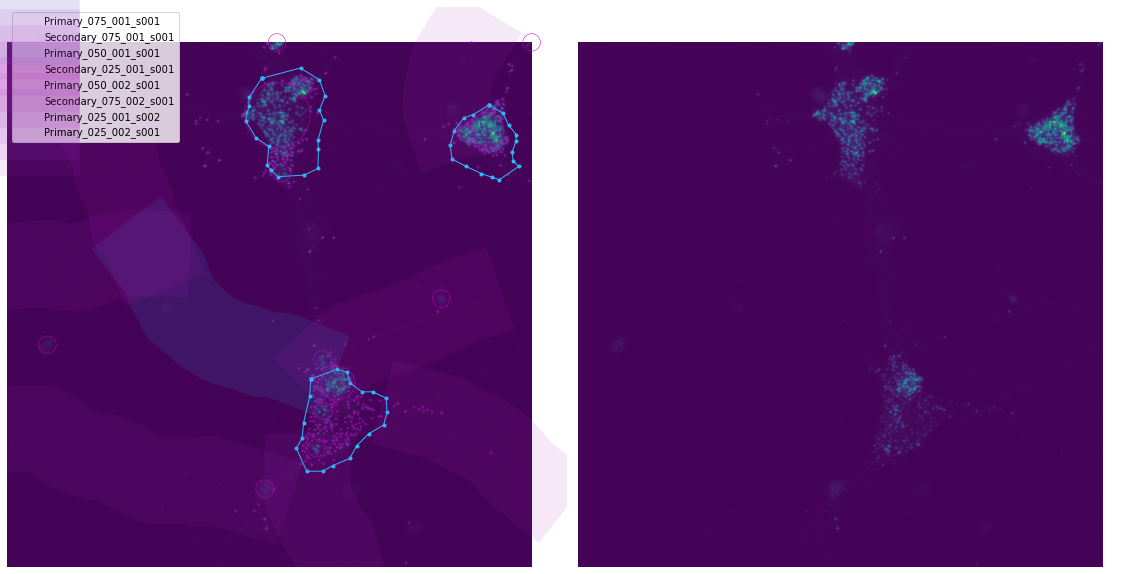

(404, 3)
****************************************
******************** Triangle ********************


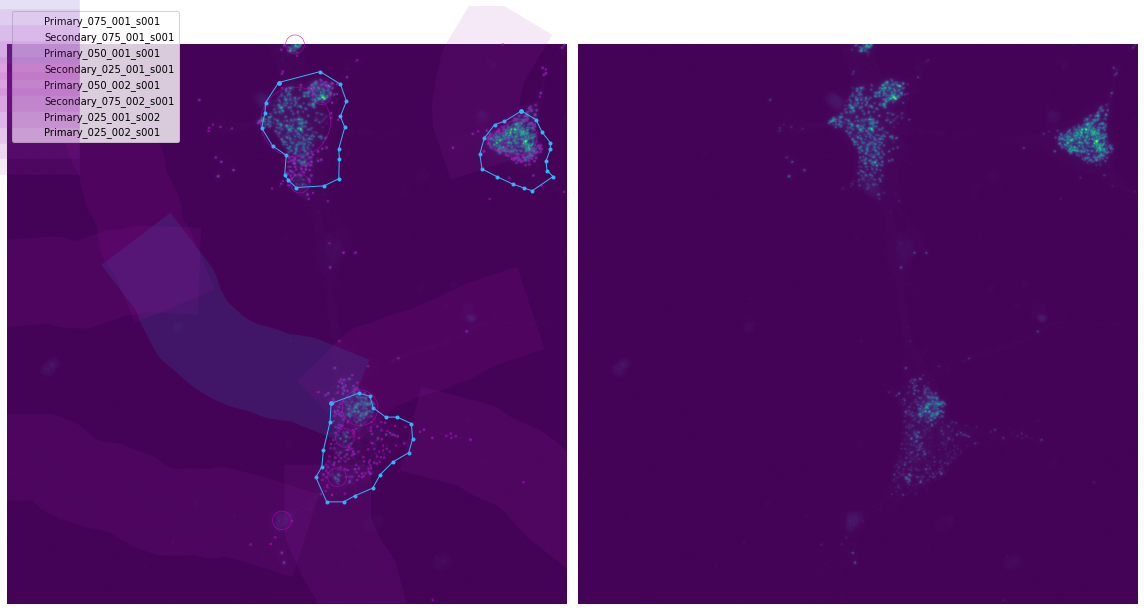

(366, 3)
****************************************


In [17]:
print("*"*20+" MEAN "+"*"*20)
threshold = threshold_mean(lsm_img);
mRNA_points = mRNA_detection(lsm_img,soma_polygons,dendrite_lines,threshold,show_plot=True)
print(np.shape(mRNA_points))
print("*"*40)
print("*"*20+" Triangle "+"*"*20)
threshold = threshold_triangle(lsm_img);
mRNA_points = mRNA_detection(lsm_img,soma_polygons,dendrite_lines,threshold,show_plot=True)
print(np.shape(mRNA_points))
print("*"*40)
# blob_log(lsm_img, min_sigma = 1.1,max_sigma= 100,threshold=t)

In [ ]:
print("*"*20+" Triangle "+"*"*20)
threshold = threshold_triangle(lsm_img);
mRNA_points = mRNA_detection(lsm_img,soma_polygons,dendrite_lines,threshold,show_plot=True)
print(np.shape(mRNA_points))
print("*"*40)

In [ ]:
fig, ax = try_all_threshold(lsm_img, figsize=(20, 16), verbose=False)

In [40]:
ts3 = []
ts3.append(["trianngle",threshold_triangle(lsm_img)])
ts3.append(["isodata",threshold_isodata(lsm_img)])
ts3.append(["mean",threshold_mean(lsm_img)])
ts3.append(["otsu",threshold_otsu(lsm_img)])
ts3.append(["li",threshold_li(lsm_img)])
ts3.append(["yen",threshold_yen(lsm_img)])
mRNA_ps3 = np.zeros((6))
# ts.append(threshold_triangle(lsm_img))
# ts.append(threshold_isodata(lsm_img))
for idx,t in enumerate(ts3):
    mRNAs = blob_log(lsm_img, min_sigma = 1.1,max_sigma= 100,threshold=t[1])
    mRNA_ps3[idx] = np.shape(mRNAs)[0]


In [41]:
for idx,t in enumerate(ts3):
    print(t[0]+" "+str(t[1])+" ",mRNA_ps3[idx])

trianngle 13.556641  832.0
isodata 60.38867  460.0
mean 4.604994  2524.0
otsu 65.31836  414.0
li 10.826897  868.0
yen 205.81445  8.0


********************trianngle********************


<ipython-input-5-73c604e3eb0d>:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


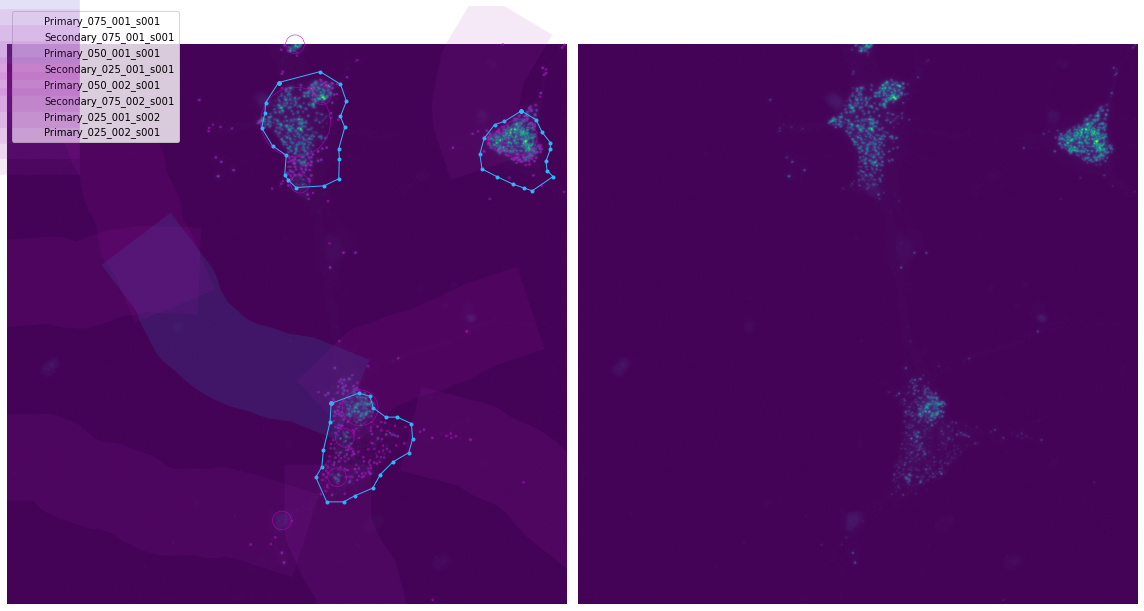

total identified mRNA puncta =  (366, 3)
**************************************************
********************isodata********************


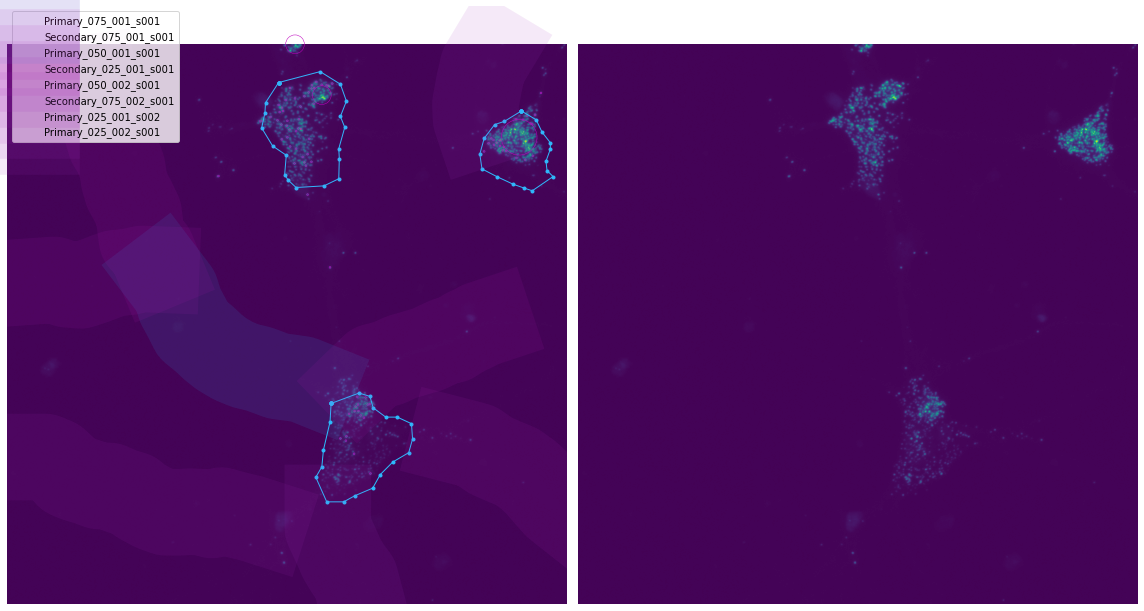

total identified mRNA puncta =  (85, 3)
**************************************************
********************mean********************


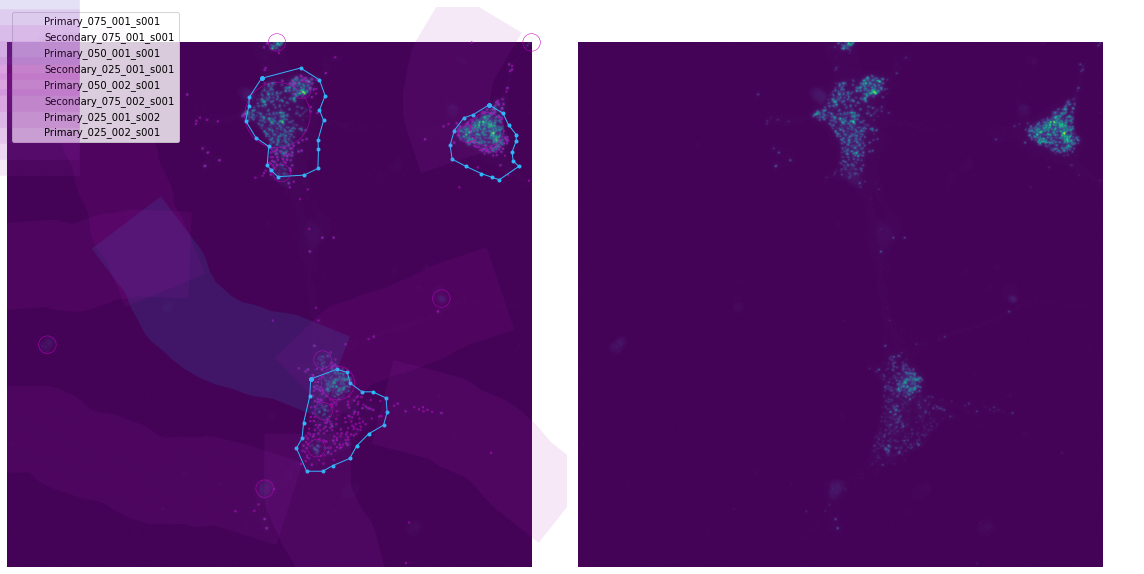

total identified mRNA puncta =  (404, 3)
**************************************************
********************otsu********************


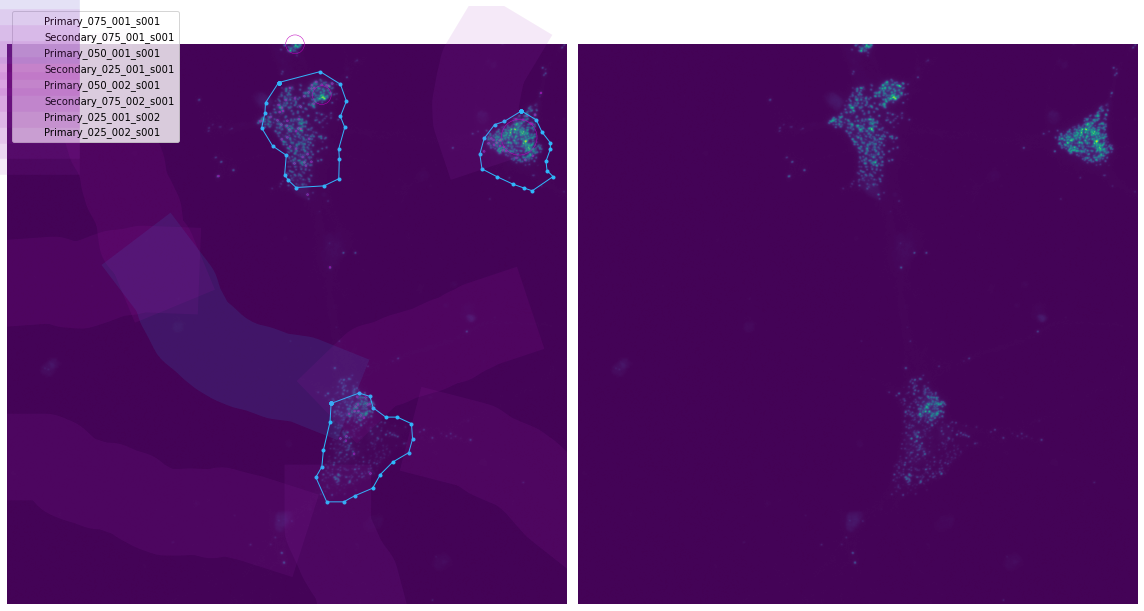

total identified mRNA puncta =  (85, 3)
**************************************************
********************li********************


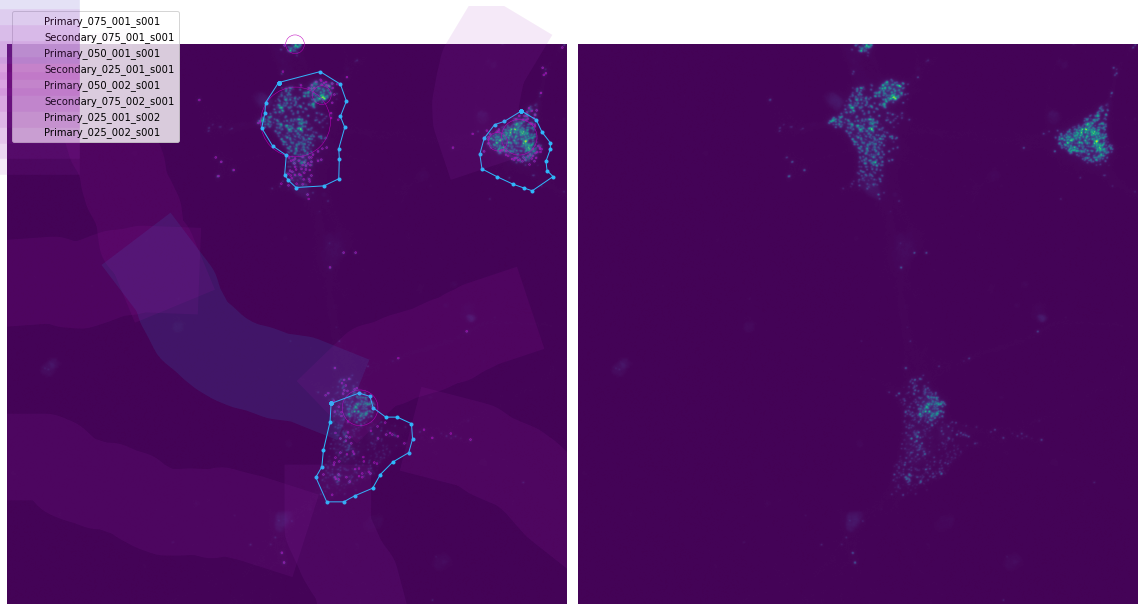

total identified mRNA puncta =  (220, 3)
**************************************************
********************yen********************


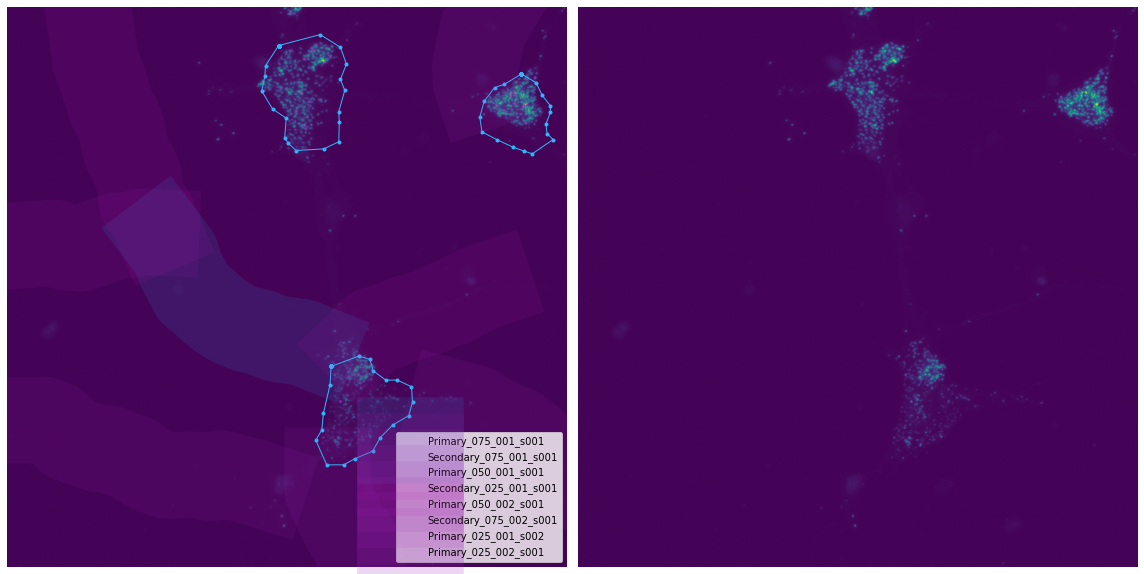

total identified mRNA puncta =  (34, 3)
**************************************************


In [20]:
for idx,t in enumerate(ts3):
    print("*"*20+t[0] +"*"*20)
    threshold = t[1];
    mRNA_pointss = mRNA_detection(lsm_img,soma_polygons,dendrite_lines,threshold,show_plot=True)
    print("total identified mRNA puncta = ", np.shape(mRNA_pointss))
    print("*"*50)

In [ ]:
print(type(dendritic_punctas))
# for jdx,dendrite in enumerate(dendrite_lines.keys())
ts = np.arange(10,100)
mRNA_ps = np.zeros((np.shape(ts)))
for idx,t in enumerate(ts):
    mRNAs = blob_log(lsm_img, min_sigma = 1.1,max_sigma= 100,threshold=t)
    mRNA_ps[idx] = np.shape(mRNAs)[0]

plt.plot(ts,mRNA_ps)
plt.show()

In [ ]:
print(np.shape(mRNA_ps))

In [ ]:
ts2 = np.arange(100,200)
mRNA_ps2 = np.zeros((np.shape(ts2)))
for idx,t in enumerate(ts2):
    mRNAs = blob_log(lsm_img, min_sigma = 1.1,max_sigma= 100,threshold=t)
#     print(np.shape(mRNA_ps2))
    mRNA_ps2[idx] = np.shape(mRNA_ps2)[0]

In [ ]:
plt.plot(ts2,mRNA_ps2)
plt.show()

In [ ]:
with open('lsm_img.npy', 'wb') as f:
     np.save(f, lsm_img)